# L10_ODE
# Notebook Setup

In [1]:
import numpy as np
from scipy import integrate
from scipy.interpolate import CubicSpline
from scipy.optimize import fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sm
import mpmath

# <font color = 'blue'>Solve with Sympy: Analytical solution</font>
## Question 1: Solve $\frac{dy}{dx} = y$ for x = 0 to x = 10 at x = 10 y = 1
<font size = 5>
<p>$\frac{dy}{y}=dx$
<p>$\int\frac{dy}{y}=\int dx$
<p>$ln(y) = x + \text{constant}$
<p>$y = C e^x$
<p>Substitute BC. $1 = C e^{10} \:\text{or}\: C = e^{-10}$
<p>$y = e^{-10} e^x$
</font>

In [2]:
x_ana = np.linspace(0,10,100)
f_ana = lambda x: np.exp(-10.0) * np.exp(x)
y_ana = f_ana(x_ana)

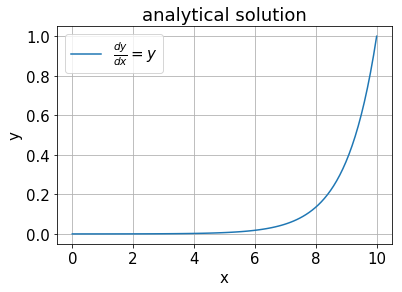

In [3]:
mpl.rc('font', size = 15)
plt.figure()
plt.plot(x_ana,y_ana, label = "$\\frac{dy}{dx}=y$")
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('analytical solution')
plt.show()

In [4]:
xs, ys = sm.symbols('x y')
fs = sm.Function('f')

In [5]:
y_sm = sm.dsolve(sm.Derivative(fs(xs),xs) - fs(xs), fs(xs)) 
y_sm

Eq(f(x), C1*exp(x))

In [6]:
C1 = sm.symbols('C1')

In [7]:
y_sm.args

(f(x), C1*exp(x))

In [8]:
C1_N = sm.solve(y_sm.args[1].subs(xs,10)-1,C1)
C1_N

[exp(-10)]

In [9]:
y_sol = y_sm.subs(C1,C1_N[0])
y_sol

Eq(f(x), exp(-10)*exp(x))

In [10]:
y_sol.args[1]

exp(-10)*exp(x)

In [11]:
sm.init_printing(use_unicode=True)

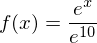

In [12]:
y_sol

In [13]:
y_sol.args[1]

## Check Q1 Sympy solution

In [14]:
sm.diff(y_sol.args[1],xs) - y_sol.args[1]

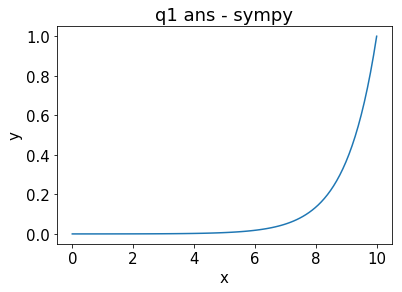

In [15]:
fq1 = sm.lambdify('x',y_sol.rhs)
plt.plot(np.linspace(0,10,100),fq1(np.linspace(0,10,100)))
plt.xlabel('x')
plt.ylabel('y')
plt.title('q1 ans - sympy')
plt.show()

### LHS = RHS &#35;

## Second order homogeneous linear-ODE
## where characteristic equation has real and distinct roots
## Question 2: $\frac{d^2 y}{dx^2} + \frac{dy}{dx} - 6y = 0$ &nbsp; @x = 0, y = 4, y' = 5. <p>Solve y for x = 0 to 1

In [16]:
sm.solve(xs**2+xs-6,xs)

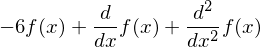

In [17]:
E2 = sm.Derivative(fs(xs),xs,xs) + sm.Derivative(fs(xs),xs) - 6*fs(xs)
E2

In [18]:
y2_sm = sm.dsolve(E2,fs(xs))
y2_sm

In [19]:
#Check sympy answer
# use .subs to substitution
# use .args[1] to get the right-hand-side of the equation

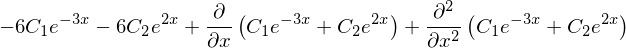

In [20]:
E2.subs({fs(xs):y2_sm.args[1]})

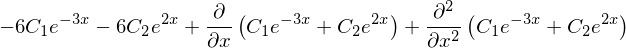

In [21]:
E2_sub = E2.subs({fs(xs):y2_sm.args[1]})
E2_sub

In [22]:
E2_sub.doit()

In [23]:
#Get constants in the solution from IC/BC
# https://stackoverflow.com/questions/34735660/sympy-second-order-ode

In [24]:
C2 = sm.symbols('C2')

In [25]:
y2_sm.args[1]

In [26]:
y2_sm.args[1].diff(xs)

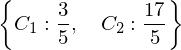

In [27]:
con1_q2 = sm.Eq(y2_sm.args[1].subs({xs:0}),4)
con2_q2 = sm.Eq(y2_sm.args[1].diff(xs).subs({xs:0}),5)
C1C2_N = sm.solve([con1_q2,con2_q2],[C1,C2])
C1C2_N

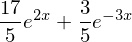

In [28]:
y2_sol = y2_sm.args[1].subs(C1C2_N)
y2_sol

In [29]:
## Rechecking BC of the final result

In [30]:
y2_sol.subs({xs:0})

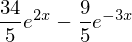

In [31]:
y2_sol.diff(xs)

In [32]:
y2_sol.diff(xs).subs({xs:0})

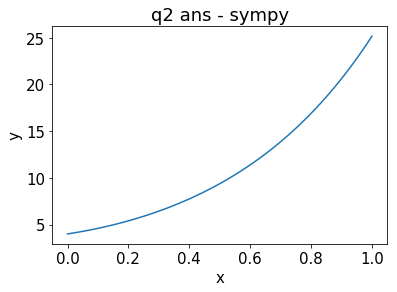

In [33]:
fq2 = sm.lambdify('x',y2_sol)
plt.plot(np.linspace(0,1,100),fq2(np.linspace(0,1,100)))
plt.xlabel('x')
plt.ylabel('y')
plt.title('q2 ans - sympy')
plt.show()

## Non-homogeneous ODE
## Question 3 $\frac{d^2 y}{dx^2} + \frac{dy}{dx} - 6y = sin(x) + x$
## BC: @ x = 0, y = 1, &nbsp;&nbsp; @ x = 1, y' = 1

RHS - LHS after substitute the answer =  0
at x = 0, y =  1.00000000000000
at x = 1, y =  1.00000000000000
answer = 



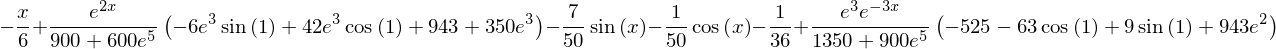

In [34]:
E3 = (sm.Derivative(fs(xs),xs,xs) + sm.Derivative(fs(xs),xs) - 6*fs(xs)
        -sm.sin(xs) - xs)
y3_sm = sm.dsolve(E3,fs(xs)).rhs
con1_q3 = sm.Eq(y3_sm.subs({xs:0}),1)
con2_q3 = sm.Eq(sm.diff(y3_sm,xs).subs({xs:1}),1)
C1C2_q3 = sm.solve([con1_q3,con2_q3],[C1,C2])
y3_sol = y3_sm.subs(C1C2_q3)
print('RHS - LHS after substitute the answer = ', E3.subs({fs(xs):y3_sm}).doit())
print('at x = 0, y = ',y3_sol.subs({xs:0}).evalf())
print('at x = 1, y = ',sm.diff(y3_sol,xs).subs({xs:1}).evalf())
print('answer = \n')
y3_sol

In [35]:
fq3 = sm.lambdify('x',y3_sol)
fq3(3)

In [36]:
y3_sol.subs({xs:3}).evalf()

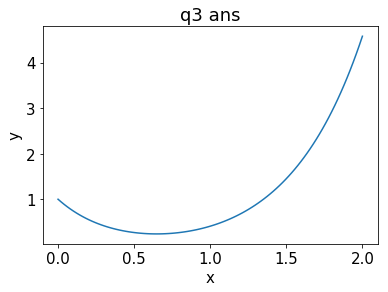

In [37]:
plt.plot(np.linspace(0,2,100),fq3(np.linspace(0,2,100)))
plt.title('q3 ans')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Question 4: Linear ODE with non-constant coefficient <br><br>$x\,\frac{d^2 y}{dx^2} + \frac{dy}{dx} - 6y = sin(x)$ <br><br> Initial value problem @x = 1, y = 1, y' = 2

In [38]:
E4 = (xs * sm.Derivative(fs(xs),xs,xs) + sm.Derivative(fs(xs),xs) - 6*fs(xs)
        -sm.sin(xs))
try:
    y4_sm = sm.dsolve(E4,fs(xs)).rhs
except Exception as e:
    print(e)


solve: Cannot solve x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x)


In [39]:
sm.classify_ode(E4,fs(xs))

In [40]:
sm.classify_ode(sm.Derivative(fs(xs),xs,xs) + sm.Derivative(fs(xs),xs) - 6*fs(xs))

('nth_linear_constant_coeff_homogeneous', '2nd_power_series_ordinary')

In [41]:
for hint in sm.ode.allhints:
    try:
        ans = sm.dsolve(E4,fs(xs),hint=hint)
        print('\n'*5)
        print(ans)
    except Exception as e:
        print(e)

ODE x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x) does not match hint separable
ODE x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x) does not match hint 1st_exact
ODE x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x) does not match hint 1st_linear
ODE x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x) does not match hint Bernoulli
ODE x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x) does not match hint Riccati_special_minus2
ODE x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x) does not match hint 1st_homogeneous_coeff_best
ODE x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x) does not match hint 1st_homogeneous_coeff_subs_indep_div_dep
ODE x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x) does not match hint 1st_homogeneous_coeff_subs_dep_div_indep
ODE x*Derivative(f(x), x, x) - 6*f(x) - sin(x) + Derivative(f(x), x) does not match hint almost_linear
ODE x*Deriva

## Question 5: Linear non-homogeneous ODE with non-constant coefficient <br><br>That sympy works! <br><br>$x^2\,\frac{d^2 y}{dx^2} + x \frac{dy}{dx} - 6y = x$ <br><br> Initial value problem @x = 1, y = 1, y' = 1

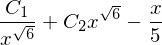

In [42]:
E5 = (xs**2 * sm.Derivative(fs(xs),xs,xs) + xs * sm.Derivative(fs(xs),xs) - 6*fs(xs)-xs)
y5_sm = sm.dsolve(E5,fs(xs)).rhs
y5_sm

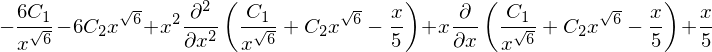

In [43]:
E5.subs({fs(xs):y5_sm})

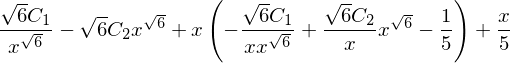

In [44]:
E5.subs({fs(xs):y5_sm}).doit()

In [45]:
E5.subs({fs(xs):y5_sm}).doit().expand()

RHS - LHS after substitute the answer =  sqrt(6)*C1*x**(-sqrt(6)) - sqrt(6)*C2*x**(sqrt(6)) + x*(-sqrt(6)*C1*x**(-sqrt(6))/x + sqrt(6)*C2*x**(sqrt(6))/x - 1/5) + x/5
at x = 1, y =  zoo
at x = 1, y =  1.00000000000000
answer = 



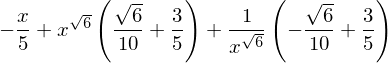

In [46]:
con1_q5 = sm.Eq(y5_sm.subs({xs:1}),1)
con2_q5 = sm.Eq(sm.diff(y5_sm,xs).subs({xs:1}),1)
C1C2_q5 = sm.solve([con1_q5,con2_q5],[C1,C2])
y5_sol = y5_sm.subs(C1C2_q5)
print('RHS - LHS after substitute the answer = ', E5.subs({fs(xs):y5_sm}).doit())
print('at x = 1, y = ',y5_sol.subs({xs:0}).evalf())
print('at x = 1, y = ',sm.diff(y5_sol,xs).subs({xs:1}).evalf())
print('answer = \n')
y5_sol

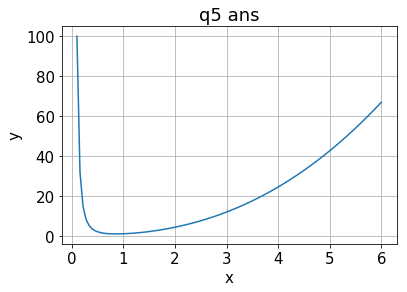

In [47]:
fq5 = sm.lambdify('x',y5_sol)
plt.plot(np.linspace(0.1,6,100),fq5(np.linspace(0.1,6,100)))
plt.title('q5 ans')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# <font color = 'blue'> Theory: Explicit Euler method</font>
<font size = 5>
<p>
$\dfrac{dy}{dx} = \mathcal{f}(x,y)$
<p>
$y_{n+1} = y_{n} + h \;\; \mathcal{f}(x_n,y_n)$
</font>
## Question 1: Solve $\frac{dy}{dx} = y$ for x = 0 to x = 10 at x = 10 y = 1
## Aproach: Start at 10 with step of -0.1 to move to 0

In [48]:
def explicit_euler(fn = lambda x,y: y,
                   ic = 1, a = 10, b = 0, h = -0.5):
    '''
    Input:
    fn is function in the form of dy/dx = fn
    ic is the initial condition (y-value), ic = fn(a)
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    '''
    n = int(np.abs((a-b)/h)) #number of interval
    y = [ic]
    x = np.linspace(a,b,n+1)
    for i in range(n):
        yi = y[i]
        xi = x[i]
        y_next = yi + h * fn(xi,yi)
        y.append(y_next)
    return np.array(x),np.array(y)

In [49]:
print(explicit_euler.__doc__)


    Input:
    fn is function in the form of dy/dx = fn
    ic is the initial condition (y-value), ic = fn(a)
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    


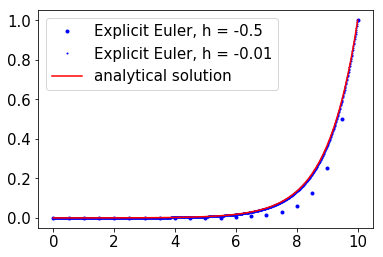

In [50]:
#Calculation
x1_ExEuler, y1_ExEuler = explicit_euler()

x1_ExEuler_b, y1_ExEuler_b = explicit_euler(h = -0.01)

#Plotting
plt.plot(x1_ExEuler,y1_ExEuler,'ob',markersize = 3, label = 'Explicit Euler, h = -0.5')
plt.plot(x1_ExEuler_b,y1_ExEuler_b,'ob',markersize = 1, label = 'Explicit Euler, h = -0.01')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)), 'r',
         label = 'analytical solution')
plt.legend()
plt.show()

# <font color = 'blue'> Implicit Euler method</font>

<font size = 5>
<p>
$y_{n+1} = y_{n} + h \;\; \mathcal{f}(x_{n+1},y_{n+1})$
<p> This is one equation one unknown ($y_{n+1}$). This can be solved by using Newton method
</font>

In [51]:
#Example
h = -0.5
x_n0 = 10
y_n0 = 1
x_n1 = 10 + h

fn = lambda x,y: y
Eq = lambda y_n1, x_n1, y_n0, h: y_n0 + h * fn(x_n1,y_n1) - y_n1

In [52]:
y_n1 = fsolve(Eq,y_n0,args=(x_n1, y_n0, h))
y_n1

array([ 0.66666667])

In [53]:
#Notice that y @ n+1 does not exactly satisfy the Implicit Euler equation
#Residual of 1e-16 is left behind 
Eq(y_n1, x_n1, y_n0, h)

array([ -1.11022302e-16])

### Implicit Euler calculation step
    1) initialize x0, y0, h, n
    2) solve Eq: y_n0 + h * fn(x_n1,y_n1) - y_n1
    3) append the y_(n+1) to the list of answer
    4) redo step 2

In [54]:
def implicit_euler(fn = lambda x,y: y,
                   ic = 1, a = 10, b = 0, h = -0.5):
    '''
    Input:
    fn is function in the form of dy/dx = fn
    ic is the initial condition (y-value), ic = fn(a)
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    
    Requirement:
    import numpy as np
    from scipy.optimize import fsolve
    '''
    n = int(np.abs((a-b)/h)) #number of interval
    y = [ic]
    x = np.linspace(a,b,n+1)
    Eq_local = lambda y_n1, x_n1, y_n0, h: y_n0 + h * fn(x_n1,y_n1) - y_n1
    
    for i in range(n):
        yi = y[i]
        xi = x[i]
        x_n1 = x[i+1]
        y_next = fsolve(Eq,y_n0,args=(x_n1, yi, h))
        y.append(y_next[0])
        
    return np.array(x),np.array(y)

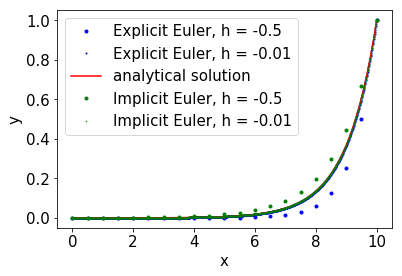

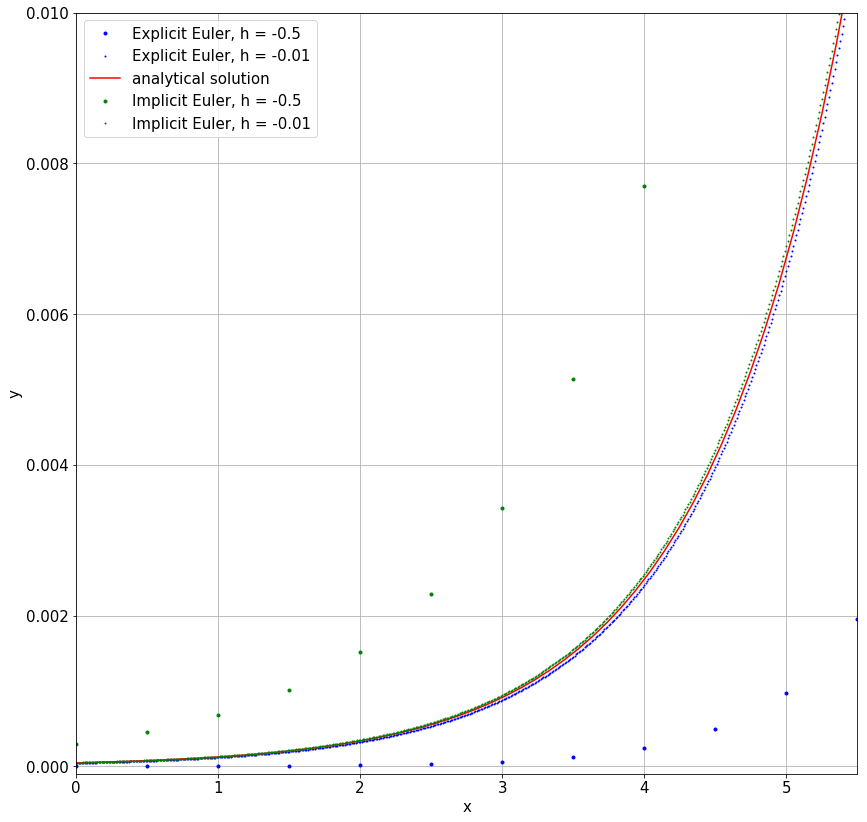

implicit method is more stable but it does not need to be more accurate


In [55]:
x1_ImEuler, y1_ImEuler = implicit_euler()

x1_ImEuler_b, y1_ImEuler_b = implicit_euler(h = -0.01)

#Plotting
plt.plot(x1_ExEuler,y1_ExEuler,'ob',markersize = 3, label = 'Explicit Euler, h = -0.5')
plt.plot(x1_ExEuler_b,y1_ExEuler_b,'ob',markersize = 1, label = 'Explicit Euler, h = -0.01')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)), 'r',
         label = 'analytical solution')
plt.plot(x1_ImEuler,y1_ImEuler,'og',markersize = 3, label = 'Implicit Euler, h = -0.5')
plt.plot(x1_ImEuler_b,y1_ImEuler_b,'og',markersize = 1, label = 'Implicit Euler, h = -0.01', alpha = 0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

#Plotting
plt.figure(figsize=(14,14))
plt.plot(x1_ExEuler,y1_ExEuler,'ob',markersize = 3, label = 'Explicit Euler, h = -0.5')
plt.plot(x1_ExEuler_b,y1_ExEuler_b,'ob',markersize = 1, label = 'Explicit Euler, h = -0.01')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)), 'r',
         label = 'analytical solution')
plt.plot(x1_ImEuler,y1_ImEuler,'og',markersize = 3, label = 'Implicit Euler, h = -0.5')
plt.plot(x1_ImEuler_b,y1_ImEuler_b,'og',markersize = 1, label = 'Implicit Euler, h = -0.01')
plt.legend()
plt.grid()
plt.xlim(0,5.5)
plt.ylim(-0.0001,0.01)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
print('implicit method is more stable but it does not need to be more accurate')

# <font color = 'blue'>Runge-Kutta 4th order </font> (Explicit Method)
<font size = 5><p><p>
For $\dfrac{dy}{dx} = \mathcal{f}(x,y)$ <p>
$y_{n+1} = y_n + \dfrac{h}{6}(k_1 + 2 \, k_2 + 2 \, k_3 + k_4)$ <p>
$k_1 = \mathcal{f}(x_n,y_n)$ <p>
$k_2 = \mathcal{f}(x_n + 0.5 \, h,y_n + 0.5 \, h \, k_1)$ <p>
$k_3 = \mathcal{f}(x_n + 0.5 \, h,y_n + 0.5 \, h \, k_2)$ <p>
$k_4 = \mathcal{f}(x_n + h,y_n + h k_3)$ <p>
</font>
## Question 1: Solve $\frac{dy}{dx} = y$ for x = 0 to x = 10 at x = 10 y = 1

In [56]:
def RK4(fn = lambda x,y: y,
                   ic = 1, a = 10, b = 0, h = -0.5):
    '''
    Input:
    fn is function in the form of dy/dx = fn
    ic is the initial condition (y-value), ic = fn(a)
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    
    Requirement:
    import numpy as np
    '''
    n = int(np.abs((a-b)/h)) #number of interval
    y = [ic]
    x = np.linspace(a,b,n+1)
    
    for i in range(n):
        yi = y[i]
        xi = x[i]
        k1 = fn(xi,yi)
        k2 = fn(xi + 0.5 * h, yi + 0.5 * h * k1)
        k3 = fn(xi + 0.5 * h, yi + 0.5 * h * k2)
        k4 = fn(xi + 1.0 * h, yi + 1.0 * h * k3)
        y_next = yi + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
        y.append(y_next)
    return np.array(x),np.array(y)    

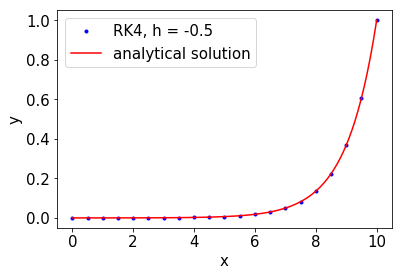

In [57]:
#Calculation
x1_RK4, y1_RK4 = RK4()

#Plotting
plt.plot(x1_RK4, y1_RK4,'ob', markersize = 3, label = 'RK4, h = -0.5')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)), 'r',
         label = 'analytical solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Backward Differentiation Formula (BDF): 6-steps
## Linear Multisetp Method for stiff ODEs <p> Less stable than Backward Euler, but more stable than an explicit method, in general

<font size = 5>
* BDF1: $ y_{n+1} - y_n = h f(t_{n+1}, y_{n+1}) $ <p>
* BDF2: $ y_{n+2} - \tfrac43 y_{n+1} + \tfrac13 y_n = \tfrac23 h f(t_{n+2}, y_{n+2}) $ <p>
* BDF3: $ y_{n+3} - \tfrac{18}{11} y_{n+2} + \tfrac9{11} y_{n+1} - \tfrac2{11} y_n = \tfrac6{11} h f(t_{n+3}, y_{n+3}) $ <p>
* BDF4: $ y_{n+4} - \tfrac{48}{25} y_{n+3} + \tfrac{36}{25} y_{n+2} - \tfrac{16}{25} y_{n+1} + \tfrac{3}{25} y_n = \tfrac{12}{25} h f(t_{n+4}, y_{n+4}) $ <p>
* BDF5: $ y_{n+5} - \tfrac{300}{137} y_{n+4} + \tfrac{300}{137} y_{n+3} - \tfrac{200}{137} y_{n+2} + \tfrac{75}{137} y_{n+1} - \tfrac{12}{137} y_n = \tfrac{60}{137} h f(t_{n+5}, y_{n+5}) $ <p>
* BDF6: $ y_{n+6} - \tfrac{360}{147} y_{n+5} + \tfrac{450}{147} y_{n+4} - \tfrac{400}{147} y_{n+3} + \tfrac{225}{147} y_{n+2} - \tfrac{72}{147} y_{n+1} + \tfrac{10}{147} y_n = \tfrac{60}{147} h f(t_{n+6}, y_{n+6}) $ <p>
</font>

In [58]:
def BDF(fn = lambda x,y: y,
                   ic = 1, a = 10, b = 0, H = -0.5, show_all_pt = False):
    '''
    Input:
    fn is function in the form of dy/dx = fn
    ic is the initial condition (y-value), ic = fn(a)
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    
    Requirement:
    import numpy as np
    from scipy.optimize import fsolve
    '''
    h = H/6
    n = int(np.floor(np.abs((a-b)/H))) #number of interval
    y = [ic]
    x = np.linspace(a,b,n+1)
    if show_all_pt == True:
        x_ans = [x[0]]
        y_ans = [ic]
    Eq1 = lambda                          y_n1,y_n0,x_n1,h: (
        y_n1 - y_n0 - h * fn(x_n1, y_n1))

    Eq2 = lambda                     y_n2,y_n1,y_n0,x_n2,h: (
        3 * y_n2 - 4 * y_n1 + y_n0 - 2 * h * fn(x_n2, y_n2))

    Eq3 = lambda                y_n3,y_n2,y_n1,y_n0,x_n3,h: (
        11* y_n3 - 18* y_n2 + 9*y_n1 - 2*y_n0 - 6 * h * fn(x_n3, y_n3))

    Eq4 = lambda           y_n4,y_n3,y_n2,y_n1,y_n0,x_n4,h: (
        25* y_n4 - 48* y_n3 +36*y_n2 -16*y_n1 +3*y_n0 - 12* h * fn(x_n4, y_n4))

    Eq5 = lambda      y_n5,y_n4,y_n3,y_n2,y_n1,y_n0,x_n5,h: (
        137 * y_n5 - 300 * y_n4 + 300 * y_n3 - 200 * y_n2 + 75 * y_n1 
        - 12 * y_n0 - 60 * h * fn(x_n5, y_n5))
        
    Eq6 = lambda y_n6,y_n5,y_n4,y_n3,y_n2,y_n1,y_n0,x_n6,h: (
        147 * y_n6 - 360 * y_n5 + 450 * y_n4 - 400 * y_n3 + 225 * y_n2 
        - 72 * y_n1 + 10 * y_n0 - 60 * h * fn(x_n6, y_n6))
    
    for i in range(n):
        y0 = y[i]
        x0 = x[i]
        x1 = x0 + 1 * h
        x2 = x0 + 2 * h
        x3 = x0 + 3 * h
        x4 = x0 + 4 * h
        x5 = x0 + 5 * h
        x6 = x0 + 6 * h
        y1 = fsolve(Eq1,y0,args=(y0,x1, h))
        y2 = fsolve(Eq2,y1,args=(y1,y0,x2, h))
        y3 = fsolve(Eq3,y2,args=(y2,y1,y0,x3, h))
        y4 = fsolve(Eq4,y3,args=(y3,y2,y1,y0,x4, h))
        y5 = fsolve(Eq5,y4,args=(y4,y3,y2,y1,y0,x5, h))
        y6 = fsolve(Eq6,y5,args=(y5,y4,y3,y2,y1,y0,x6, h))
        y.append(y6)
        if show_all_pt == True:
            x_ans = x_ans + [x1,x2,x3,x4,x5,x6]
            y_ans = y_ans + [y1,y2,y3,y4,y5,y6]
    if show_all_pt == True:
        return np.array(x_ans),np.array(y_ans)
    else:
        return np.array(x),np.array(y)

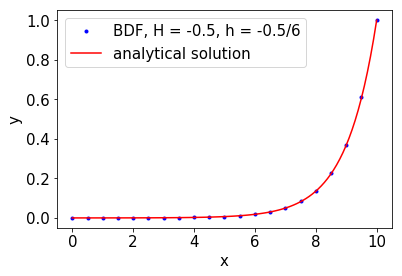

In [59]:
#Calculation
x1_BDF, y1_BDF = BDF()

#Plotting
plt.plot(x1_BDF, y1_BDF,'ob', markersize = 3, label = 'BDF, H = -0.5, h = -0.5/6')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)), 'r',
         label = 'analytical solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

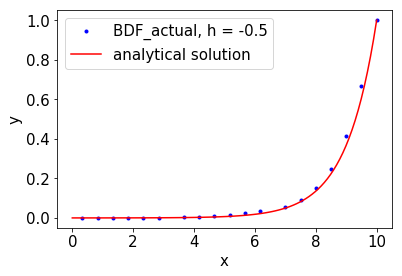

In [60]:
#Calculation
x1_BDF_a, y1_BDF_a = BDF(H = -3, show_all_pt=True)

#Plotting
plt.plot(x1_BDF_a, y1_BDF_a,'ob', markersize = 3, label = 'BDF_actual, h = -0.5')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)), 'r',
         label = 'analytical solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [61]:
q1_exact_sol = np.array([y_sol.args[1].subs({xs:i}).evalf() for i in x1_BDF]
                       , dtype = float)
q1_exact_sol_bdf_a = np.array([y_sol.args[1].subs({xs:i}).evalf() for i in x1_BDF_a]
                       , dtype = float)

In [62]:
#each small step is -0.5 / 6, each big step is -0.5
np.linalg.norm(q1_exact_sol - y1_BDF)

In [63]:
#each small step is -0.5
np.linalg.norm(q1_exact_sol_bdf_a - y1_BDF_a)

In [64]:
np.linalg.norm(q1_exact_sol - y1_RK4)

In [65]:
np.linalg.norm(q1_exact_sol - y1_ImEuler)

In [66]:
np.linalg.norm(q1_exact_sol - y1_ExEuler)

# <font color = 'blue'>Lobatto IIIC methods</font>
(L-stable/ 4th order): <b>Fully Implicit</b>: More stable than BDF. Good for stiff equation
<font size = 4><br> In Butcher Tableau format, we have <p>
$
\begin{array}{c|cccc}
0   & \dfrac{1}{12} & \dfrac{-\sqrt{5}}{12} & \dfrac{\sqrt{5}}{12} & \dfrac{-1}{12}  \\
\dfrac{1}{2} - \dfrac{\sqrt{5}}{10} & \dfrac{1}{12} & \dfrac{1}{4} & \dfrac{10-7\sqrt{5}}{60}& \dfrac{\sqrt{5}}{60}\\
\dfrac{1}{2} + \dfrac{\sqrt{5}}{10}   & \dfrac{1}{12} & \dfrac{10+7\sqrt{5}}{60} & \dfrac{1}{4} & \dfrac{-\sqrt{5}}{60}  \\
1 & \dfrac{1}{12} & \dfrac{5}{12} & \dfrac{5}{12} & \dfrac{1}{12}  \\
\hline
 & \dfrac{1}{12} & \dfrac{5}{12} & \dfrac{5}{12} & \dfrac{1}{12}  \\\\
\end{array}
$

This is for solving <p>
$\frac{d y}{d t} = f(t, y)$
<p> where <p>

$y_{n+1} = y_n + h \sum_{i=1}^s b_i k_i$ <p>
$k_1 = f(t_n, y_n), $ <p>
$k_2 = f(t_n+c_2h, y_n+h(a_{21}k_1)), $ <p>
$k_3 = f(t_n+c_3h, y_n+h(a_{31}k_1+a_{32}k_2)), $ <p>
$\vdots $ <p>
$k_i = f\left(t_n + c_i h, y_n + h \sum_{j = 1}^{i-1} a_{ij} k_j\right), $ 

<p> and <p>

$
\begin{array}{c|cccc}
c_1    & a_{11} & a_{12}& \dots & a_{1s}\\
c_2    & a_{21} & a_{22}& \dots & a_{2s}\\
\vdots & \vdots & \vdots& \ddots& \vdots\\
c_s    & a_{s1} & a_{s2}& \dots & a_{ss} \\
\hline
       & b_1    & b_2   & \dots & b_s\\
\end{array}
$
</font><p>
http://homepage.math.uiowa.edu/~ljay/publications.dir/Lobatto.pdf <br>
https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods
<p>After expanding it, we have<p>
$g_1 = k_1 - f\Big(t_n, \: y_n + h \Big( \dfrac{1}{12} k_1 + \dfrac{-\sqrt{5}}{12} k_2 + \dfrac{\sqrt{5}}{12} k_3 + \dfrac{-1}{12} k_4 \Big)\Big)$ <p>
$g_2 = k_2 - f\Big(t_n + \Big(\dfrac{1}{2} - \dfrac{\sqrt{5}}{10}\Big)\;h, \: y_n + h \Big( \dfrac{1}{12} k_1 + \dfrac{1}{4} k_2 + \dfrac{10-7\sqrt{5}}{60} k_3 + \dfrac{\sqrt{5}}{60} k_4 \Big)\Big)$ <p>
$g_3 = k_3 - f\Big(t_n + \Big(\dfrac{1}{2} + \dfrac{\sqrt{5}}{10}\Big)\;h, \: y_n + h \Big( \dfrac{1}{12} k_1 + \dfrac{10+7\sqrt{5}}{60} k_2 + \dfrac{1}{4} k_3 + \dfrac{-\sqrt{5}}{60} k_4 \Big)\Big)$ <p>
$g_4 = k_4 - f\Big(t_n + h, \: y_n + h \Big( \dfrac{1}{12} k_1 + \dfrac{5}{12} k_2 + \dfrac{5}{12} k_3 + \dfrac{1}{12} k_4 \Big)\Big)$ <p>
The right k1 to k4 will make g1 to g4 become 0 simultaneously <p>
$y_{n+1} = y_n + h \Big( \dfrac{1}{12} k_1 + \dfrac{5}{12} k_2 + \dfrac{5}{12} k_3 + \dfrac{1}{12} k_4 \Big)$

<p> Solve k1 to k4, non-linear equations simultaneously to get the next y value

In [67]:
def LobattoIIIC(fn = lambda x,y: y,
                   ic = 1, a = 10, b = 0, h = -0.5):
    '''
    Very stable method (Lobatto III C, L-stable / fully implicit)
    Input:
    fn is function in the form of dy/dx = fn
    ic is the initial condition (y-value), ic = fn(a)
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    
    Internal usage function: fn_LIIIC
        fn_LIIIC is the function returning list
                 it is for calculating k1 to k4 of LobattoIIIC
                 if the input k[0:4] is correct [0,0,0,0]
                 is returned
    
    Requirement:
    import numpy as np
    from scipy.optimize import fsolve
    '''
    def fn_LIIIC(k,x0,y0,h):
        """This is function to be used in LobattoIIIC"""
        k1 = k[0]
        k2 = k[1]
        k3 = k[2]
        k4 = k[3]
        f = []
        f.append(k1-fn(x0,y0 + h*(1/12*k1 - 5**0.5 /12 * k2
            + 5**0.5/12 * k3 -1/12*k4)))
        f.append(k2-fn(x0 + (0.5 - 5**0.5/10)*h, y0 + h*(1/12*k1 
            + 0.25*k2 + (10 - 7*5**0.5)/60*k3 + 5**0.5/60*k4)))
        f.append(k3-fn(x0 + (0.5 + 5**0.5/10)*h, y0 + h*(1/12*k1 
            + (10+7*5**0.5)/60*k2 + 0.25*k3 - 5*0.5/60*k4)))
        f.append(k4-fn(x0 + h,y0 + h*(1/12*k1 + 5/12*k2 + 5/12*k3
            + 1/12*k4)))
        return f
    
    n = int(np.abs((a-b)/h)) #number of interval
    y = [ic]
    x = np.linspace(a,b,n+1)
    #initial guess
    k1 = 1
    k2 = 0
    k3 = 0
    k4 = 0
    for i in range(n):
        yi = y[i]
        xi = x[i]
        k1,k2,k3,k4 = fsolve(fn_LIIIC,[k1,k2,k3,k4],args=(xi,yi,h))
        y_next = yi + h*(1/12*k1 + 5/12*k2 + 5/12*k3 + 1/12*k4)
        y.append(y_next)
    return np.array(x),np.array(y)   

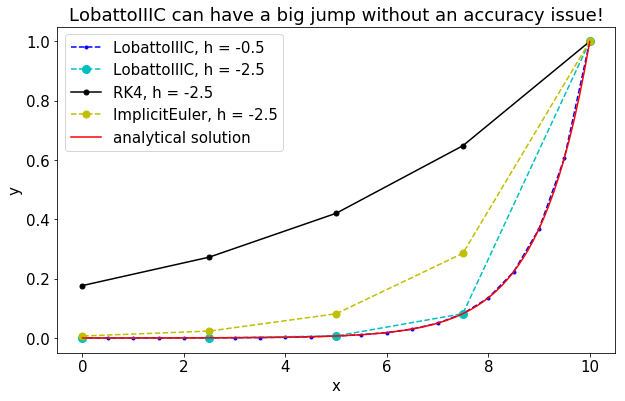

RK4 is an explicit scheme, so it can perform badly at a large interval


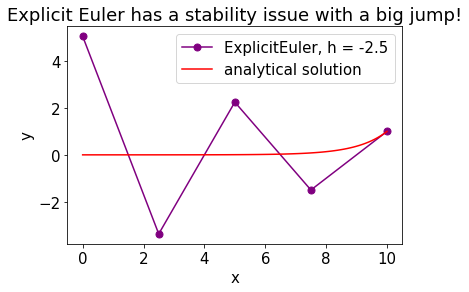

In [68]:
#Calculation
x1_Lobat3C, y1_Lobat3C = LobattoIIIC()
x1_Lobat3C_hl, y1_Lobat3C_hl = LobattoIIIC(h=-2.5)
x1_RK4_hl, y1_RK4_hl = RK4(h=-2.5)
x1_Im_hl, y1_Im_hl = implicit_euler(h = -2.5)
x1_Ex_hl, y1_Ex_hl = explicit_euler(h = -2.5)

#Plotting
plt.figure(figsize = (10,6))
plt.plot(x1_Lobat3C, y1_Lobat3C,'--ob', markersize = 3, 
         label = 'LobattoIIIC, h = -0.5')
plt.plot(x1_Lobat3C_hl, y1_Lobat3C_hl,'--oc', markersize = 8, 
         label = 'LobattoIIIC, h = -2.5')
plt.plot(x1_RK4_hl, y1_RK4_hl,'-ok', markersize = 5, 
         label = 'RK4, h = -2.5')
plt.plot(x1_Im_hl, y1_Im_hl,'--oy', markersize = 7, 
         label = 'ImplicitEuler, h = -2.5')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)),
         'r', label = 'analytical solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('LobattoIIIC can have a big jump without an accuracy issue!')
plt.show()
print('RK4 is an explicit scheme, so it can perform badly at a large interval')
plt.plot(x1_Ex_hl, y1_Ex_hl,'-o', color = 'purple', markersize = 7, 
         label = 'ExplicitEuler, h = -2.5')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)),
         'r', label = 'analytical solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Explicit Euler has a stability issue with a big jump!')
plt.show()

# <font color = 'blue'>Dormand-Prince 5(4)</font> :Manual
Explicit Method. Adaptive step size. Compare 4th and 5th order to adjust the stepsize
<br>Same as the one used in MATLAB ode45. Somewhat better than RKF45 <p>


$
\begin{array}{c|cccc}
0      &            & & & & & & \\
1/5    & 1/5        & & & & & & \\
3/10   & 3/40       & 9/40        & & & & & \\
4/5    & 44/45      & -56/15      & 32/9       & & & & \\
8/9    & 19372/6561 & -25360/2187 & 64448/6561 & -212/729 & & & \\
1      & 9017/3168  & -355/33     & 46732/5247 & 49/176   & -5103/18656 & & \\
1      & 35/384     & 0           & 500/1113   & 125/192  & -2187/6784  & 11/84& \\
\hline
       & 35/384     & 0           & 500/1113   & 125/192  & -2187/6784  & 11/84& 0\\
       & 5179/57600 & 0           & 7571/16695 & 393/640  & -92097/339200 & 187/2100& 1/40\\
\end{array}
$

<p>https://en.wikipedia.org/wiki/Dormand%E2%80%93Prince_method
<p>https://github.com/scipy/scipy/blob/v0.19.1/scipy/integrate/dop/dopri5.f
<p>http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.408.7247&rep=rep1&type=pdf

In [69]:
def DormandPrince(fn = lambda x,y: y, ic = 1, a = 10, 
                  b = 0, h = -0.5, eps = 1.0e-6):
    '''
    Dormand-Prince 5(4) Adaptive step-size
    Input:
    fn is function in the form of dy/dx = fn
    ic is the initial condition (y-value), ic = fn(a)
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    
    Requirement:
    import numpy as np
    '''
    y = [ic]
    x = [a]

    c2 = 1/5;         a21 = 1/5
    c3 = 3/10;        a31 = 3/40;       a32 = 9/40
    c4 = 4/5;         a41 = 44/45;      a42 = -56/15;
    a43 = 32/9
    c5 = 8/9;         a51 = 19372/6561; a52 = -25360/2187 
    a53 = 64448/6561; a54 = -212/729
    c6 = 1;           a61 = 9017/3168;  a62 = -355/33;
    a63 = 46732/5247; a64 = 49/176;     a65 = -5103/18656
    c7 = 1;           a71 = 35/384;     a72 = 0;
    a73 = 500/1113;   a74 = 125/192;     a75 = -2187/6784;
    a76 = 11/84
    b11 = 35/384;     b12 = 0;          b13 = 500/1113;
    b14 = 125/192;    b15 = -2187/6784; b16 = 11/84;
    b17 = 0
    b21 = 5179/57600; b22 = 0;          b23 = 7571/16695;
    b24 = 393/640
    b25 = -92097/339200; b26 = 187/2100; b27 = 1/40
    
    s = 1
    
    for i in range(100):
        yi = y[i]
        xi = x[i]
        if abs(xi-b) < 1e-14:
            break
        for j in range(100):
            h = h * s
            if h < 0:
                if xi + h < b:
                    h = b - xi
            if h > 0:
                if xi + h > b:
                    h = b - xi
            if abs(h) < 1e-6:
                h = h / abs(h) * 1e-6
            k1 = fn(xi, yi)
            k2 = fn(xi + c2*h, yi + h*(a21*k1))
            k3 = fn(xi + c3*h, yi + h*(a31*k1 + a32*k2))
            k4 = fn(xi + c4*h, yi + h*(a41*k1 + a42*k2 + a43*k3))
            k5 = fn(xi + c5*h, yi + h*(a51*k1 + a52*k2 + a53*k3 
                    + a54*k4))
            k6 = fn(xi + c6*h, yi + h*(a61*k1 + a62*k2 + a63*k3
                    + a64*k4 + a65*k5))
            k7 = fn(xi + c7*h, yi + h*(a71*k1 + a72*k2 + a73*k3
                    + a74*k4 + a75*k5 + a76*k6))
            y4 = yi + h*(b11*k1 + b12*k2 + b13*k3 + b14*k4 
                    + b15*k5 + b16*k6)
            y5 = yi + h*(b21*k1 + b22*k2 + b23*k3 + b24*k4 
                    + b25*k5 + b26*k6 + b27*k7)
        
            err = abs(y5 - y4)
            if err < 1e-20: #sometimes err == 0 (get exact solution)
                s = 4
            else:
                s = (abs(eps*h/2/err))**0.2
            if s >= 1: #accept the solution
                if s > 4:
                    s = 4
                y.append(y5)
                x.append(xi+h)
                break
            if s < 0.01:
                s = 0.01
        else: #run when for j end without break
            print('cannot find the ans within 100 iteration')
            y.append(y5)
            x.append(xi+h)

    return np.array(x),np.array(y)  

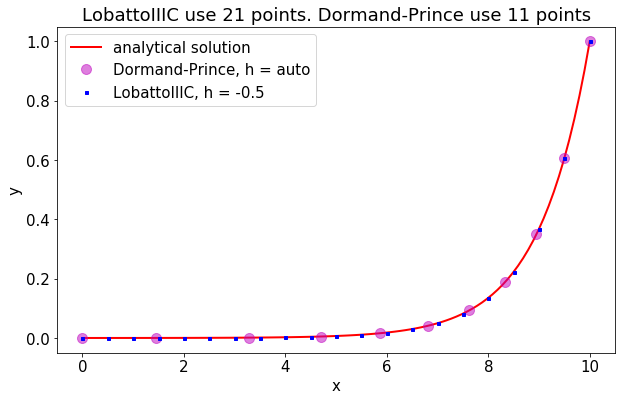

average error from Dormand-Prince 5(4) =  -2.97720218779e-05
average error from LobattoIIIC =  -7.43312233914e-05
Notice that even though the first step is the same
Dormand-Prince method use less points (more efficient)


In [70]:
x1_dp, y1_dp = DormandPrince(eps=2e-4)

#Plotting
plt.figure(figsize = (10,6))
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)),
         'r', label = 'analytical solution', linewidth = 2)
plt.plot(x1_dp, y1_dp,'om', markersize = 10, 
         label = 'Dormand-Prince, h = auto', alpha = 0.5)
plt.plot(x1_Lobat3C, y1_Lobat3C,'bs', markersize = 3, 
         label = 'LobattoIIIC, h = -0.5')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('LobattoIIIC use 21 points. Dormand-Prince use 11 points')
plt.show()
y1_dp_exact = np.exp(-10)*np.exp(x1_dp)
y1_dp_err = (y1_dp - y1_dp_exact).mean()

y1_Lobat3C_exact = np.exp(-10)*np.exp(x1_Lobat3C)
y1_Lobat3C_err = (y1_Lobat3C - y1_Lobat3C_exact).mean()
print('average error from Dormand-Prince 5(4) = ', y1_dp_err)
print('average error from LobattoIIIC = ', y1_Lobat3C_err)
print('Notice that even though the first step is the same')
print('Dormand-Prince method use less points (more efficient)')

# <font color = 'blue'>System of ODEs / Higher Order ODE</font>
<font size = 4><p><p>
For a higher order ode, it must be broken down into many first order ODE, first.
</font>

## Question 3 $\frac{d^2 y}{dx^2} + \frac{dy}{dx} - 6y = sin(x) + x$
## BC: @ x = 0, y = 1, &nbsp;&nbsp; @ x = 1, y' = 1
<br>
<font size = 4>
The first order forms are <br>
<p>$\dfrac{dy_0}{dx}=y_1$
<p>$\dfrac{dy_1}{dx}=sin(x)+x+6y_0-y_1$
</font>
## Solve numerically with RK4
## First, just assume y' at x = 0 to be -1 (which may not be right yet)
This simplifies the problem from BC to IC problems.
Later, find the right guess of IC to satisfy BC by Newton method / fsolve


In [71]:
def RK4_many(fn = lambda x,y: np.array([y[1], 
                np.sin(x) + x + 6 * y[0] - y[1]]),
                ic = [1,-1], a = 0, b = 1, h = 0.1):
    '''
    Input:
    fn is function
        fn input is x & y (y is list: y = [y0,y1,...])
        fn output is numpy array of odes RHS or [fn0, fn1] where
            dy0/dx = fn0
            dy1/dx = fn1
        fn output must be numpy array!
    ic is the initial condition (y-value), ic = [fn0(a), fn1(a)]
    ic MUST be list
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    
    Requirement:
    import numpy as np
    '''
    n = int(np.abs((a-b)/h)) #number of interval
    y = np.array([ic])
    x = np.linspace(a,b,n+1)
    
    for i in range(n):
        yi = y[i]
        xi = x[i]
        #Notice that there is no change to the code below.
        #Yet everything works just fine. Beauty of Python!
        k1 = fn(xi,yi)
        k2 = fn(xi + 0.5 * h, yi + 0.5 * h * k1)
        k3 = fn(xi + 0.5 * h, yi + 0.5 * h * k2)
        k4 = fn(xi + 1.0 * h, yi + 1.0 * h * k3)
        y_next = yi + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
        #instead of list.append, use np.r_[y,[ans]] 
        # to create 2D matrix
        y = np.r_[y,[y_next]]
    return x,y

In [72]:
#scratch paper --find out how to append ans together--
test = np.array([1,2,3])
ans = np.array([[1,2,3]])
for i in range(5):
    ans = np.r_[ans,[test]]
ans

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [73]:
ans = np.array([])
ans = np.r_[ans,test]
ans = np.r_[ans,test]
ans = np.r_[ans,test]
ans

array([ 1.,  2.,  3.,  1.,  2.,  3.,  1.,  2.,  3.])

In [74]:
#scratch paper --find out how to append ans together--
test[np.newaxis,:]

array([[1, 2, 3]])

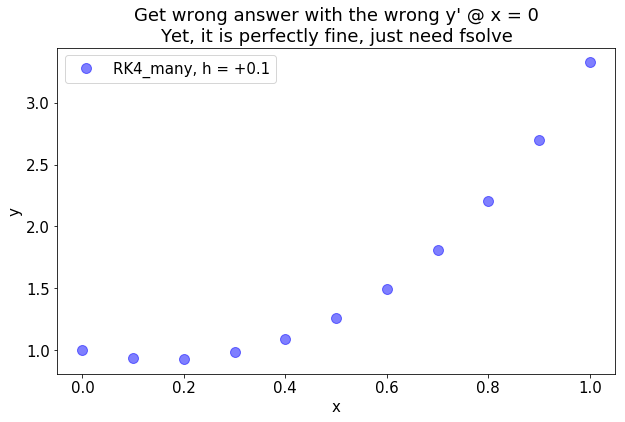

In [75]:
#answer from step 1 (start with a wrong initial guess of y')
x3p1_RK4_many, y3p1_RK4_many = RK4_many()
#Plotting
plt.figure(figsize = (10,6))
plt.plot(x3p1_RK4_many, y3p1_RK4_many[:,0],'ob', markersize = 10, 
         label = 'RK4_many, h = +0.1', alpha = 0.5)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Get wrong answer with the wrong y\' @ x = 0' + 
          '\nYet, it is perfectly fine, just need fsolve')
# plt.xlim(9,10)
# plt.ylim(0,10)
plt.show()

## Shooting method: Adjust initial guess, until y' at x = 1 become 1
Use fsolve / Newton method / Bisection method to do this

In [76]:
#create function return the last value of y
#based on an adjustable initial guess x
fx = lambda x:RK4_many(h = 0.05, ic=[1,x])[1][-1,1] - 1
ic_y1 = fsolve(fx,-1)
ic_y1

array([-2.98710141])

In [77]:
RK4_many(ic = [1,ic_y1])

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 array([[ 1.        , -2.98710141],
        [ 0.74240215, -2.20075642],
        [ 0.55383693, -1.5964317 ],
        [ 0.4188175 , -1.1222779 ],
        [ 0.32638376, -0.73894122],
        [ 0.2690336 , -0.41611417],
        [ 0.24195443, -0.12993262],
        [ 0.24248265,  0.13901071],
        [ 0.26973812,  0.40720879],
        [ 0.32439649,  0.68946971],
        [ 0.40857288,  0.99993316]]))

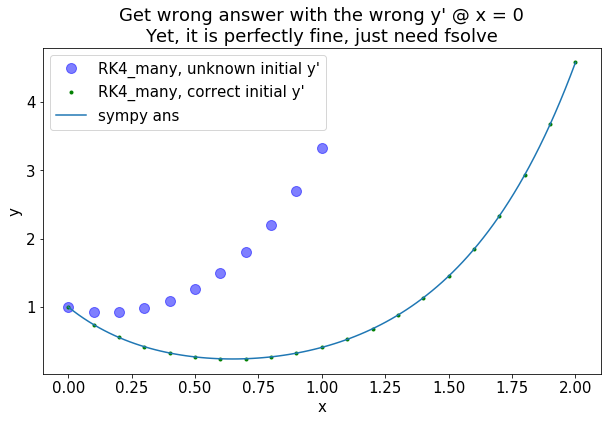

In [78]:
#answer from step 1 (start with a wrong initial guess of y')
x3pf_RK4_many, y3pf_RK4_many = RK4_many(b = 2, ic = [1,ic_y1])
#Plotting
plt.figure(figsize = (10,6))
plt.plot(x3p1_RK4_many, y3p1_RK4_many[:,0],'ob', markersize = 10, 
         label = 'RK4_many, unknown initial y\'', alpha = 0.5)
plt.plot(x3pf_RK4_many, y3pf_RK4_many[:,0],'og', markersize = 3, 
         label = 'RK4_many, correct initial y\'')
plt.plot(np.linspace(0,2,100),fq3(np.linspace(0,2,100)), label = 'sympy ans')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Get wrong answer with the wrong y\' @ x = 0' + 
          '\nYet, it is perfectly fine, just need fsolve')
# plt.xlim(9,10)
# plt.ylim(0,10)
plt.show()

# <font color = 'blue'>Higher order ODE with LobattoIIIC</font>
## Explanation from Implicit Euler case
<font size = 4> <br>
<p>$\vec{y} = [y_0,y_1]$
<p>$\vec{y}_{n+1} = \vec{y}_n + \vec{f}(x_{n+1},\vec{y}_{n+1})$
<p>$\vec{f}(x,\vec{y}) = [\:f_0(x,\vec{y}),\:\:f_1(x,\vec{y})\:]$
<p>For LobattoIIIC, f0 and f1 may require both y0 and y1
<p>Therefore, they need to be solved simultaneously
</font>

In [79]:
def LobattoIIIC_many(fn = lambda x,y: np.array([y[1], 
                np.sin(x) + x + 6 * y[0] - y[1]]),
                ic = [1,-1], a = 0, b = 1, h = 0.1):
    
    '''
    Trick: Send flat array to fsolve to solve 4*n non-linear equations
    Send function back as a flat array and reshape later
    
    Very stable method (Lobatto III C, L-stable / fully implicit)
    Input:
    fn is function
        fn input is x & y (y is list: y = [y0,y1,...])
        fn output is numpy array of odes RHS or [fn0, fn1] where
            dy0/dx = fn0
            dy1/dx = fn1
        fn output must be numpy array!
    ic is the initial condition (y-value), ic = [fn0(a), fn1(a)]
    ic MUST be list
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    
    Internal usage function: fn_LIIIC
        fn_LIIIC is the function returning list
                 it is for calculating k1 to k4 of LobattoIIIC
                 if the input k[0:4] is correct [0,0,0,0]
                 is returned
    
    Requirement:
    import numpy as np
    from scipy.optimize import fsolve
    '''
    def fn_LIIIC(k,x0,y0,h):
        """This is function to be used in LobattoIIIC"""
        k = k.reshape(4,-1)
        k1 = k[0]
        k2 = k[1]
        k3 = k[2]
        k4 = k[3]
        #instead of append, make 4 by n array. Output the flatten f
        f = np.array([(k1-fn(x0,y0 + h*(1/12*k1 - 5**0.5 /12 * k2
            + 5**0.5/12 * k3 -1/12*k4)))])
        f = np.r_[f,[(k2-fn(x0 + (0.5 - 5**0.5/10)*h, y0 + h*(1/12*k1 
            + 0.25*k2 + (10 - 7*5**0.5)/60*k3 + 5**0.5/60*k4)))]]
        f = np.r_[f,[(k3-fn(x0 + (0.5 + 5**0.5/10)*h, y0 + h*(1/12*k1 
            + (10+7*5**0.5)/60*k2 + 0.25*k3 - 5*0.5/60*k4)))]]
        f = np.r_[f,[(k4-fn(x0 + h,y0 + h*(1/12*k1 + 5/12*k2 + 5/12*k3
            + 1/12*k4)))]]
        return f.reshape(-1)
   
    n = int(np.abs((a-b)/h)) #number of interval
    y = np.array([ic])
    x = np.linspace(a,b,n+1)
    #initial guess
    k1 = y
    k2 = y
    k3 = y
    k4 = y
    for i in range(n):
        yi = y[i]
        xi = x[i]
        #send horizontal vector to fsolve
        k_ans = fsolve(fn_LIIIC,
            np.r_[k1,k2,k3,k4].reshape(-1), args=(xi,yi,h))
        k1,k2,k3,k4 = k_ans.reshape(4,-1)
        y_next = yi + h*(1/12*k1 + 5/12*k2 + 5/12*k3 + 1/12*k4)
        y = np.r_[y,[y_next]]
    return x,y

In [80]:
q3_yp_ic = y3pf_RK4_many[0,1]
LobattoIIIC_many(b = 2, ic = [1,q3_yp_ic])

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 array([[ 1.        , -2.98710141],
        [ 0.74226817, -2.20036288],
        [ 0.55363337, -1.59585006],
        [ 0.41858201, -1.12163829],
        [ 0.32613583, -0.73832572],
        [ 0.26878012, -0.4155756 ],
        [ 0.24169326, -0.12950761],
        [ 0.24220458,  0.13929239],
        [ 0.26942783,  0.40731733],
        [ 0.32403256,  0.68936979],
        [ 0.40812719,  0.99957909],
        [ 0.52523646,  1.35228352],
        [ 0.68036311,  1.76284092],
        [ 0.88012922,  2.24842107],
        [ 1.13299788,  2.82882684],
        [ 1.44958029,  3.52738849],
        [ 1.8430377 ,  4.37197538],
        [ 2.32959229,  5.39617179],
        [ 2.929166  ,  6.64066864],
        [ 3.6661716 ,  8.15493025],
        [ 4.57048704,  9.99920542]]))

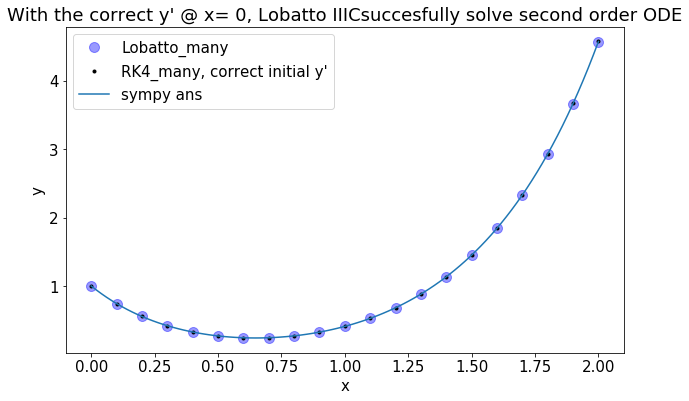

In [81]:
#Use y' answer from RK4 many for the initial guess
q3_yp_ic = y3pf_RK4_many[0,1]
x3_LIIIC_many, y3_LIIIC_many = LobattoIIIC_many(b = 2, ic = [1,q3_yp_ic])
#Plotting
plt.figure(figsize = (10,6))
plt.plot(x3_LIIIC_many, y3_LIIIC_many[:,0],'ob', markersize = 10, 
         label = 'Lobatto_many', alpha = 0.4)
plt.plot(x3pf_RK4_many, y3pf_RK4_many[:,0],'ok', markersize = 3, 
         label = 'RK4_many, correct initial y\'')
plt.plot(np.linspace(0,2,100),fq3(np.linspace(0,2,100)), label = 'sympy ans')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('With the correct y\' @ x= 0, Lobatto IIIC' + 
          'succesfully solve second order ODE')
plt.show()

# <font color = 'blue'>Let's make Dormand-Prince work for a higher order ODE</font>
Step-by-step is shown in the code below. This is for us to completely understand the procedure. Moreover, it allows us to code a more complicated method that is not in Scipy by ourselves. At least, understanding the algorithm help us to understand other people code on the internet. When actually doing it, use dopri5 option in scipy.

In [82]:
test = np.array([-1,-2,-3])
test

array([-1, -2, -3])

In [83]:
np.r_[test,6]

array([-1, -2, -3,  6])

In [84]:
ic = [1,-1]

In [85]:
y= np.array([ic])
y

array([[ 1, -1]])

In [86]:
np.r_[y,[[4,5]]]

array([[ 1, -1],
       [ 4,  5]])

In [87]:
def DormandPrince_many(fn = lambda x,y: np.array([y[1], 
        np.sin(x) + x + 6 * y[0] - y[1]]), ic = [1,-1],
        a = 0, b = 1, h = 0.1, eps = 1.0e-6):
    '''
    Dormand-Prince 5(4) Adaptive step-size
    Input:
    fn is function
        fn input is x & y (y is list: y = [y0,y1,...])
        fn output is numpy array of odes RHS or [fn0, fn1] where
            dy0/dx = fn0
            dy1/dx = fn1
        fn output must be numpy array!
    ic is the initial condition (y-value), ic = [fn0(a), fn1(a)]
    ic MUST be list
    a  is the start point
    b  is the end point
    h  is the step size (use negative value to step backward)
    Output:
    numpy array of x and y in the format of (x,y)
    
    Requirement:
    import numpy as np
    '''
    #just change from list to numpy for _many option
    y = np.array([ic]) 
    x = np.array([a])

    c2 = 1/5;         a21 = 1/5
    c3 = 3/10;        a31 = 3/40;       a32 = 9/40
    c4 = 4/5;         a41 = 44/45;      a42 = -56/15;
    a43 = 32/9
    c5 = 8/9;         a51 = 19372/6561; a52 = -25360/2187 
    a53 = 64448/6561; a54 = -212/729
    c6 = 1;           a61 = 9017/3168;  a62 = -355/33;
    a63 = 46732/5247; a64 = 49/176;     a65 = -5103/18656
    c7 = 1;           a71 = 35/384;     a72 = 0;
    a73 = 500/1113;   a74 = 125/192;     a75 = -2187/6784;
    a76 = 11/84
    b11 = 35/384;     b12 = 0;          b13 = 500/1113;
    b14 = 125/192;    b15 = -2187/6784; b16 = 11/84;
    b17 = 0
    b21 = 5179/57600; b22 = 0;          b23 = 7571/16695;
    b24 = 393/640
    b25 = -92097/339200; b26 = 187/2100; b27 = 1/40
    
    s = 1
    
    for i in range(100):
        yi = y[i]
        xi = x[i]
        if abs(xi-b) < 1e-14:
            break
        for j in range(100):
            h = h * s
            if h < 0:
                if xi + h < b:
                    h = b - xi
            if h > 0:
                if xi + h > b:
                    h = b - xi
            if abs(h) < 1e-6:
                h = h / abs(h) * 1e-6
            #k now is numpy array. Same dimension as the output
            k1 = fn(xi, yi) 
            k2 = fn(xi + c2*h, yi + h*(a21*k1))
            k3 = fn(xi + c3*h, yi + h*(a31*k1 + a32*k2))
            k4 = fn(xi + c4*h, yi + h*(a41*k1 + a42*k2 + a43*k3))
            k5 = fn(xi + c5*h, yi + h*(a51*k1 + a52*k2 + a53*k3 
                    + a54*k4))
            k6 = fn(xi + c6*h, yi + h*(a61*k1 + a62*k2 + a63*k3
                    + a64*k4 + a65*k5))
            k7 = fn(xi + c7*h, yi + h*(a71*k1 + a72*k2 + a73*k3
                    + a74*k4 + a75*k5 + a76*k6))
            y4 = yi + h*(b11*k1 + b12*k2 + b13*k3 + b14*k4 
                    + b15*k5 + b16*k6)
            y5 = yi + h*(b21*k1 + b22*k2 + b23*k3 + b24*k4 
                    + b25*k5 + b26*k6 + b27*k7)
        
            err = abs(y5 - y4).max()
            #add .max() to adjust s according to
            #the highest error term
            if err < 1e-20: #sometimes err == 0 (get exact solution)
                s = 4
            else:
                s = (abs(eps*h/2/err))**0.2
            if s >= 1: #accept the solution
                if s > 4:
                    s = 4
                #change from y.append(y5) to
                y = np.r_[y,[y5]]
                #change from x.append(xi+h) to
                x = np.r_[x,xi+h]
                break
            if s < 0.01:
                s = 0.01
        else: #run when for j end without break
            print('cannot find the ans within 100 iteration')
            y = np.r_[y,[y5]]
            x = np.r_[x,xi+h]

    return x,y

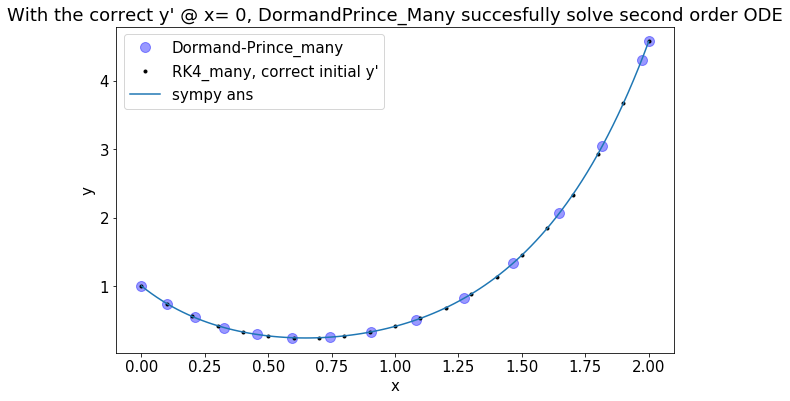

In [88]:
q3_yp_ic = y3pf_RK4_many[0,1]
x3_dopri_many, y3_dopri_many = DormandPrince_many(b = 2, 
                                            ic = [1,q3_yp_ic],eps=2e-4)
#Plotting
plt.figure(figsize = (10,6))
plt.plot(x3_dopri_many, y3_dopri_many[:,0],'ob', markersize = 10, 
         label = 'Dormand-Prince_many', alpha = 0.4)
plt.plot(x3pf_RK4_many, y3pf_RK4_many[:,0],'ok', markersize = 3, 
         label = 'RK4_many, correct initial y\'')
plt.plot(np.linspace(0,2,100),fq3(np.linspace(0,2,100)), label = 'sympy ans')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('With the correct y\' @ x= 0, DormandPrince_Many' + 
          ' succesfully solve second order ODE')
plt.show()

# <font color = 'blue'>Solve with Scipy: Numerical Solution</font> <p>`scipy.integrate.ode`
## Question 1: First order ODE
## $\frac{dy}{dx} = y$ for x = 0 to x = 10 at x = 10 y = 1
## Coding steps
<font size = 5>
<p>1 create ode_solver as `scipy.integrate.ode` class 
<p>2 select the integration method to be used ['dopri5', 'vode', ...]
<p>3 specify method detail such as setting absolute tolerance (atol)
<p>4 setting the initial value from `.set_initial_value(y0,t0)`
</font>
## Dormand-Prince 5(4)
<font size = 4>
dopri54 use adaptive stepsize approach in the calculation. Errors from 4th and 5th order methods are compared to select a proper stepsize. We need to retrieve the intermediate calculation value from `object.integrate` to get the non-uniform stepsize assign by dopri54
<p><b> Retrieving intermediate calculation value in `dpori54`</b>
<br>1 set the solution output from `.set_solout`.  This method need a function as an input.  The input function is called with the input (t, y) on every internal calculation step. The strategy is to make this function store the y and t (dependent vector and independent variable) at each internal calculation step. It is suggested to use
</font>
<font face = 'monospace' size = 4>
<br>sol = []
<br>def solout(t,y):
<br>&nbsp;&nbsp;&nbsp;&nbsp; sol.append([t,*y])
<br>&nbsp;&nbsp;&nbsp;&nbsp; return None
<br>ode_solver.set_solout(solout)
</font>
<font size = 4>
<br> \* is needed, otherwise, get array + incorrect answer
</font>
## VODE: Variable coefficient ODE
<font size = 4>
Use implicit Adams method for non-stiff problem, use backward differntiation formulas (BDF) for stiff problem
<br> VODE integrator does not allow the use of set_solout. Methods `"adams"` and `"BDF"` are constant step with implicit approach. After setting the method we need to run it manually step by step (sequentially) by using `object.integrate(x_value)`. Once run, the ode_solver move to the next t-location (value of `object.y` and `object.t` changes). Don't run twice, unless reset the object setup (including the initial condition value)
</font>
<p> https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.ode.html
<p> https://stackoverflow.com/questions/12926393/using-adaptive-step-sizes-with-scipy-integrate-ode

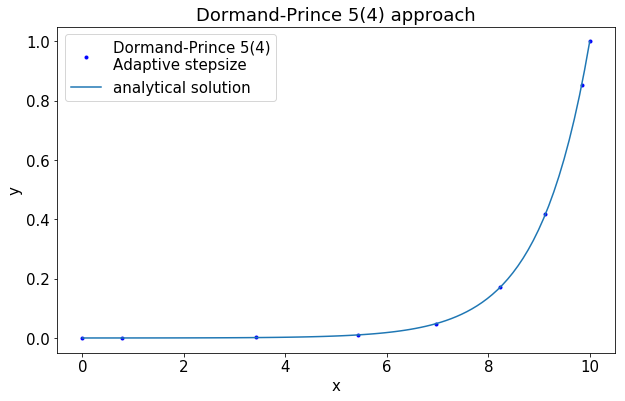

In [89]:
fnp1 = lambda x, y: y
sol = []
def solout(t,y):
    sol.append([t,*y])
    return None
ode_solver = integrate.ode(fnp1)
ode_solver.set_integrator('dopri5', atol = 0.01)
ode_solver.set_initial_value(1,10)
ode_solver.set_solout(solout)
ode_solver.integrate(0)
data = np.array(sol)
plt.figure(figsize = (10,6))
plt.title('Dormand-Prince 5(4) approach')
plt.plot(data[:,0],data[:,1],'ob',markersize = 3, 
          label = 'Dormand-Prince 5(4)\nAdaptive stepsize')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)), 
         label = 'analytical solution')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

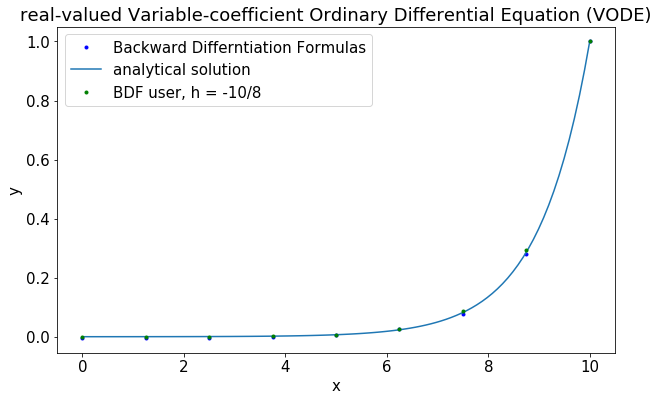

In [90]:
fnp1 = lambda x, y: y

ode_solver = integrate.ode(fnp1)
ode_solver.set_integrator('vode', method = 'bdf', atol = 0.01)
ode_solver.set_initial_value(1,10)
x_ode = np.linspace(10,0,9)

y_ans = [1] + [ode_solver.integrate(i)[0] for i in x_ode[1:]]
data = np.c_[x_ode,np.array(y_ans)]
plt.figure(figsize = (10,6))
plt.title('real-valued Variable-coefficient Ordinary Differential Equation (VODE)')
plt.plot(data[:,0],data[:,1],'ob',markersize = 3, 
          label = 'Backward Differntiation Formulas')
plt.plot(np.linspace(0,10,100),np.exp(-10)*np.exp(np.linspace(0,10,100)), 
         label = 'analytical solution')

plt.ylabel('y')
plt.xlabel('x')

#Calculation (user function)
x1_BDF8, y1_BDF8 = BDF(H = -10/8)

#Plotting
plt.plot(x1_BDF8, y1_BDF8,'og', markersize = 3, label = 'BDF user, h = -10/8')
plt.legend()
plt.show()

# `scipy.integrate.odeint`
<br><font size = 4>
`.odeint` is somewhat less complicated compared to `.ode` object. `.odeint` just use LSODA from Fortran library. This method provides the automatic switching between implicit Adams and BDF. Thus, it is a constant stepsize method.
</font>

In [91]:
f_odeint1 = lambda y, x: y
x_odeint1 = np.linspace(10,0,9)
y_result1 = integrate.odeint(f_odeint1, 1, x_odeint1)
y_result1

array([[  1.00000000e+00],
       [  2.86504815e-01],
       [  8.20849915e-02],
       [  2.35177465e-02],
       [  6.73794811e-03],
       [  1.93045494e-03],
       [  5.53083466e-04],
       [  1.58460719e-04],
       [  4.54009268e-05]])

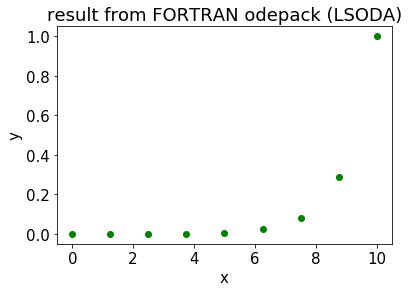

In [92]:
plt.plot(x_odeint1, y_result1,'og')
plt.ylabel('y')
plt.xlabel('x')
plt.title('result from FORTRAN odepack (LSODA)')
plt.show()

# How do we know if the result is correct?
<br>
<font size = 4>
1 Use cubic spline and calculate derivative on all points (except the end) then check with governing equation
<br>2 Use central finite difference (2, 3, 4, 5 .. points method) to calculate derivative and check with the governing equation
</font>

## Check with cubicspline

In [93]:
cspline_check = CubicSpline(x_odeint1[::-1],y_result1[::-1], bc_type=((1,[np.exp(-10)]),(1,[1])))
slope = cspline_check.derivative()
#not that bc_type was set to be the value according to the governing equation
#cubic spline do the interpolation from x = 0 to x = 10 (opposite to the integration direction)
#From governing equation, at x = 0 we don't know the slope!
#From the analytical solution, at x = 0, slope = exp-10
#From boundary condition, at x = 10, y = 1 = slope
#bc_type must be (tuple_for_start, tuple_for_end_section)
#then we have bc_type =((diff order, slope val), (diff order, slope val))
#bracket is needed to make the dimension match (otherwise syntax error)

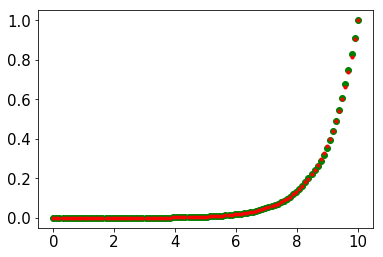

In [94]:
x_chk = np.linspace(0,10,100)
slope_chk = slope(x_chk)
y_chk = cspline_check(x_chk)
plt.plot(x_chk,slope_chk,'og')
plt.plot(x_chk,y_chk,'or',markersize = 3)
plt.show()

In [95]:
#with different bc_type, the slope from cubic spline near both ends can be wrong

## Check mannually with finite difference

In [96]:
x_rechk, y_rechk = x_odeint1[::-1],y_result1[::-1]
x_rechk, y_rechk

(array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,  10.  ]),
 array([[  4.54009268e-05],
        [  1.58460719e-04],
        [  5.53083466e-04],
        [  1.93045494e-03],
        [  6.73794811e-03],
        [  2.35177465e-02],
        [  8.20849915e-02],
        [  2.86504815e-01],
        [  1.00000000e+00]]))

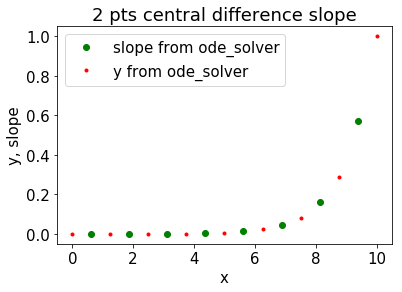

In [97]:
slope_man = [((y_rechk[i+1]-y_rechk[i])/(x_rechk[i+1]-x_rechk[i]))[0] 
                 for i in range(x_rechk.shape[0]-1)]
x_for_slope = [(x_rechk[i+1]+x_rechk[i])*0.5
                 for i in range(x_rechk.shape[0]-1)]
plt.title('2 pts central difference slope')
plt.plot(x_for_slope,slope_man,'og', label = 'slope from ode_solver')
plt.plot(x_rechk,y_rechk,'or', markersize = 3, label = 'y from ode_solver')
plt.legend()
plt.xlabel('x')
plt.ylabel('y, slope')
plt.show()

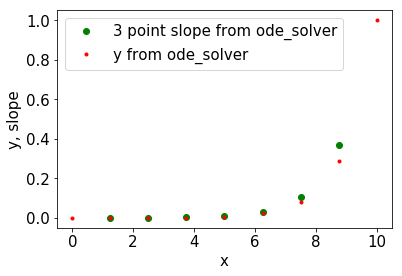

In [98]:
slope2 = [(slope_man[i]+slope_man[i+1])*0.5 for i in range(len(slope_man)-1)]
xslope2 = [(x_for_slope[i]+x_for_slope[i+1])*0.5 for i in range(len(slope_man)-1)]
plt.plot(xslope2,slope2,'og', label = '3 point slope from ode_solver')
plt.plot(x_rechk,y_rechk,'or', markersize = 3, label = 'y from ode_solver')
plt.legend()
plt.xlabel('x')
plt.ylabel('y, slope')
plt.show()

# Question 2: $\frac{d^2 y}{dx^2} + \frac{dy}{dx} - 6y = 0$ &nbsp; @x = 0, y = 4, y'' = 5. Solve y for x = 0 to 5

<font size = 4> Second order ODE cannot be solved directly. It must be separated into two ODEs first.
<br><p>f1 := $M = \frac{dy}{dx}$
<p>$\frac{dM}{dx} + M - 6y = 0$ &nbsp;&nbsp; or &nbsp;&nbsp; f2 := $\frac{dM}{dx} = 6y - M$
<p>coding-wise, Everything stay the same, except the function definition
<p> take y as a list/array instead of float, and output list of two member
<p> rhs of first equation is the first member of the list output
<p> rhs of the second equation is the second member of the list
<p> First equation is to solve dy/dx = M or y[1], thus the first answer in soloutput is y not y'
<p> Adjust the initial condition accordingly
</font>
<p>https://nathantypanski.com/blog/2014-08-23-ode-solver-py.html

In [99]:
sol2 = []
def solout2(t,y):
    sol2.append([t,*y])
    return None

f12q2 = lambda x,y: [y[1], 6 * y[0] - y[1]]
q2_ode = integrate.ode(f12q2)
q2_ode.set_integrator('dopri5')
q2_ode.set_initial_value([4,5],0)
q2_ode.set_solout(solout2)
q2_ode.integrate(5)

array([  74890.07764655,  149780.15529217])

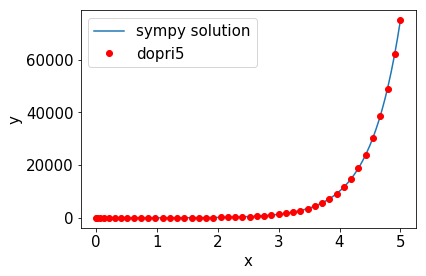

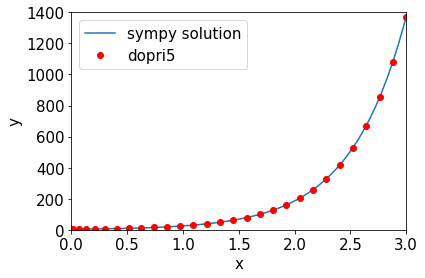

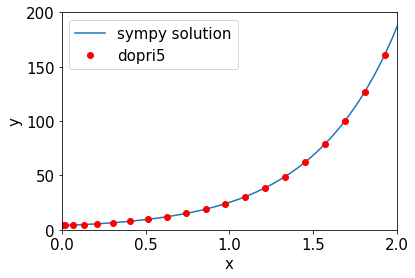

In [100]:
sol2np = np.array(sol2)
fq2 = sm.lambdify('x',y2_sol)
plt.plot(np.linspace(0,5,100),fq2(np.linspace(0,5,100)), label = 'sympy solution')
plt.plot(sol2np[:,0],sol2np[:,1],'or',label = 'dopri5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure()
plt.plot(np.linspace(0,5,100),fq2(np.linspace(0,5,100)), label = 'sympy solution')
plt.plot(sol2np[:,0],sol2np[:,1],'or',label = 'dopri5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0,3)
plt.ylim(0,1400)
plt.show()

plt.figure()
plt.plot(np.linspace(0,5,100),fq2(np.linspace(0,5,100)), label = 'sympy solution')
plt.plot(sol2np[:,0],sol2np[:,1],'or',label = 'dopri5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(0,2)
plt.ylim(0,200)
plt.show()

# Question 4: Linear ODE with non-constant coefficient <br><br>$x\,\frac{d^2 y}{dx^2} + \frac{dy}{dx} - 6y = sin(x)$ <br><br> Initial value problem @x = 1, y = 1, y' = 2


<font size = 4>
$ y = y[0]$ ( not used in coding )
<p>$\frac{dy}{dx} = y[1]$
<p>$\frac{d^2y}{dx^2} = \frac{d}{dx}y[1] = \big(sin(x) - y[1] + 6y[0]\big) \frac{1}{x}$
</font>

In [101]:
sol4 = []
def solout4(t,y):
    sol4.append([t,*y])
    return None

f12q4 = lambda x,y: [y[1], (6 * y[0] - y[1] + np.sin(x))*1/x]
q4_ode = integrate.ode(f12q4)
q4_ode.set_integrator('dopri5',rtol = 1e-6)
q4_ode.set_initial_value([1,2],1)
q4_ode.set_solout(solout4)
q4_ode.integrate(5)

array([ 292.13024929,  304.91045584])

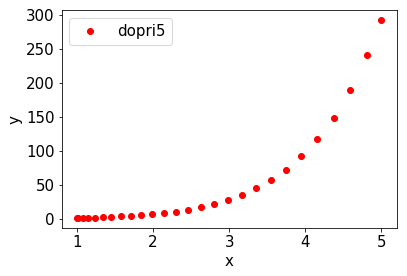

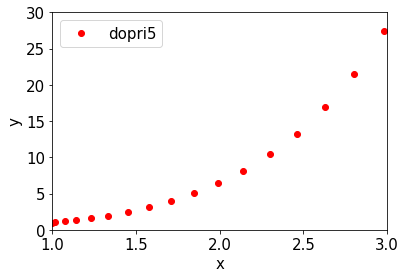

In [102]:
sol4np = np.array(sol4)
plt.plot(sol4np[:,0],sol4np[:,1],'or',label = 'dopri5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure()
plt.plot(sol4np[:,0],sol4np[:,1],'or',label = 'dopri5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim(1,3)
plt.ylim(0,30)
plt.show()

In [103]:
#calculate y'', y' and x at the middle location of x output (central difference scheme)
y2_q4 = [((sol4np[i+1,2]-sol4np[i,2])/(sol4np[i+1,0]-sol4np[i,0]))
                 for i in range(sol4np.shape[0]-1)]
y1_q4 = [((sol4np[i+1,2]+sol4np[i,2])*0.5)
                 for i in range(sol4np.shape[0]-1)]
y0_q4 = [((sol4np[i+1,1]+sol4np[i,1])*0.5)
                 for i in range(sol4np.shape[0]-1)]
xslope_q4 = [((sol4np[i+1,0]+sol4np[i,0])*0.5)
                 for i in range(sol4np.shape[0]-1)]

<font size = 4>
$x\,\frac{d^2 y}{dx^2} + \frac{dy}{dx} - 6y = sin(x)$
<p>1) Calculate LHS - RHS at every x and plot. If get zero, then it is correct
<p> or
<p>2) Recalculate y from the governing equation and compared with the calculated result
</font>


In [104]:
y2_q4np = np.array(y2_q4)
y1_q4np = np.array(y1_q4)
y0_q4np = np.array(y0_q4)
x_q4np = np.array(xslope_q4) 
q4_chk = x_q4np * y2_q4np + y1_q4np - 6 * y0_q4np - np.sin(x_q4np)
q4_y_cal = (x_q4np * y2_q4np + y1_q4np - np.sin(x_q4np))/6

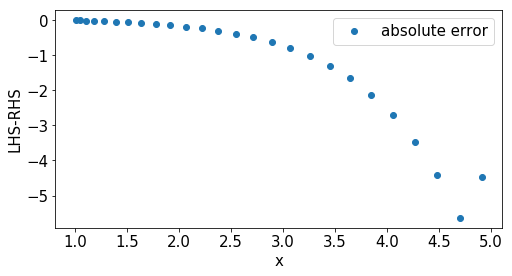

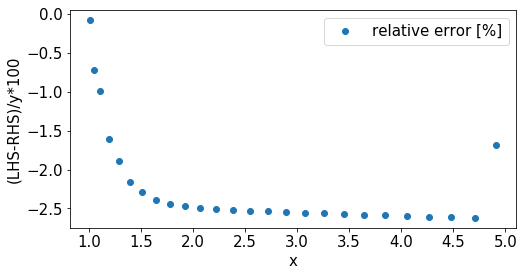

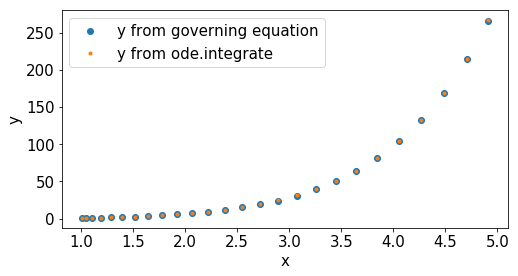

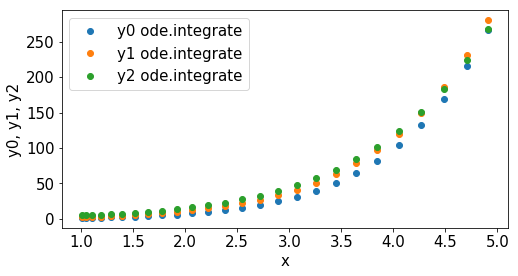

In [105]:
plt.figure(figsize = (8,4))
plt.plot(x_q4np,q4_chk,'o',label = 'absolute error')
plt.xlabel('x')
plt.ylabel('LHS-RHS')
plt.legend()
plt.show()

plt.figure(figsize = (8,4))
plt.plot(x_q4np,q4_chk/y0_q4np*100,'o',label = 'relative error [%]')
plt.legend()
plt.xlabel('x')
plt.ylabel('(LHS-RHS)/y*100')
plt.show()

plt.figure(figsize = (8,4))
plt.plot(x_q4np,q4_y_cal,'o', label = 'y from governing equation')
plt.plot(x_q4np,y0_q4np,'o',markersize = 3, label = 'y from ode.integrate')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize = (8,4))
plt.plot(x_q4np,y0_q4np,'o', label = 'y0 ode.integrate')
plt.plot(x_q4np,y1_q4np,'o', label = 'y1 ode.integrate')
plt.plot(x_q4np,y2_q4np,'o', label = 'y2 ode.integrate')
plt.legend()
plt.xlabel('x')
plt.ylabel('y0, y1, y2')
plt.show()

# Solving boundary value problem, numerically
## use `scipy.integration.solve_bvp`
## Question 3 $\frac{d^2 y}{dx^2} + \frac{dy}{dx} - 6y = sin(x) + x$
## BC: @ x = 0, y = 1, &nbsp;&nbsp; @ x = 1, y' = 1

<font size = 4>
The first order forms are <br>
<p>$\dfrac{dy_0}{dx}=y_1$
<p>$\dfrac{dy_1}{dx}=sin(x)+x+6y_0-y_1$

</font>
<br> https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.solve_bvp.html#r44

In [106]:
# Specify boundary condition and governing ODE
def bc_3(ya, yb):
    return np.array([ya[0] - 1, yb[1] - 1])
    #we use yb[1] because at b (or x = 1), we know the slope
    # not the point value. slope = [1], point value = [0]
def fun_3(x,y):
    return np.vstack((y[1], np.sin(x) + x + 6 * y[0] - y[1]))

In [107]:
# Specify domain x and initial guess y
# With different y we may get different answer if multiple answer exists
x_3 = np.linspace(0,1,100)
y_3 = np.ones((2,x_3.size))
#y has 2 row (initial guess for y[0] and y[1])

In [108]:
sol_3 = integrate.solve_bvp(fun_3,bc_3,x_3,y_3)

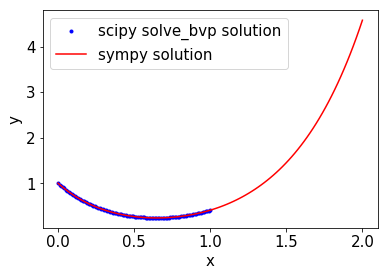

notice that x MUST start and end at the location where BC is specified!


In [109]:
plt.plot(x_3,sol_3.y[0],'ob',markersize = 3, label = 'scipy solve_bvp solution')
plt.plot(np.linspace(0,2,100),fq3(np.linspace(0,2,100)),'r',label = 'sympy solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print('notice that x MUST start and end at the location where BC is specified!')

In [110]:
sol_3

       message: 'The algorithm converged to the desired accuracy.'
         niter: 1
             p: None
 rms_residuals: array([  1.79034063e-07,   1.78013643e-07,   1.76791058e-07,
         1.75652807e-07,   1.74474988e-07,   1.73285454e-07,
         1.72119998e-07,   1.70793242e-07,   1.69525252e-07,
         1.68253038e-07,   1.66988360e-07,   1.65662551e-07,
         1.64299719e-07,   1.62947038e-07,   1.61633697e-07,
         1.60189540e-07,   1.58769905e-07,   1.57398801e-07,
         1.55896078e-07,   1.54467921e-07,   1.53100743e-07,
         1.51477752e-07,   1.49993875e-07,   1.48439098e-07,
         1.47050947e-07,   1.45375083e-07,   1.43825989e-07,
         1.42359113e-07,   1.40674332e-07,   1.39143337e-07,
         1.37532243e-07,   1.35942461e-07,   1.34452043e-07,
         1.32803049e-07,   1.31191855e-07,   1.29763344e-07,
         1.28114113e-07,   1.26531469e-07,   1.24961712e-07,
         1.23437222e-07,   1.21941856e-07,   1.20478873e-07,
         1.19051666e-07,

In [111]:
print('IC for the next calculation for y is', sol_3.y[0][-1])

IC for the next calculation for y is 0.408574670943


In [112]:
print('IC for the next calculation for y\' is', sol_3.y[1][-1])

IC for the next calculation for y' is 1.0


In [113]:
sol3 = []
def solout3(t,y):
    sol3.append([t,*y])
    return None
ode3 = integrate.ode(fun_3)
ode3.set_integrator('dopri5')
ode3.set_initial_value([sol_3.y[0][-1],sol_3.y[1][-1]], 1)
ode3.set_solout(solout3)
ode3.integrate(2)

array([  4.57694411,  10.01200907])

In [114]:
sol3

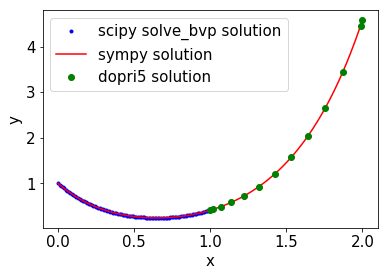

In [115]:
sol3np = np.array(sol3)
plt.plot(x_3,sol_3.y[0],'ob',markersize = 3, label = 'scipy solve_bvp solution')
plt.plot(np.linspace(0,2,100),fq3(np.linspace(0,2,100)),'r',label = 'sympy solution')
plt.plot(sol3np[:,0],sol3np[:,1],'og', label = 'dopri5 solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()